# Econometrics - Week 2

In [1]:
import numpy as np
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1.12. Пример. Доверительный интервал для коэффициента бета [у доски]

Задача:
- Построить 95% доверительный интервал для b_A

Условия задачи:

In [129]:
n_obs = 47
b_ = np.array([59.8, 0.109, 0.115])
var_b_ = np.array([[15.9, -0.257, -0.007], 
                   [-0.257, 0.00616, -0.00135], 
                   [-0.007, -0.00135, 0.00182]]).T

Функция для рассчета:

In [7]:
def confidence_interval_coeff(b_, var_b, b_ind, n_obs, level=0.95, round_fact=4):
    degr_free = n_obs - b_.shape[0]
    t_dist = np.random.standard_t(degr_free, size=100000)
    q = level + (1 - level) / 2
    quantile = np.quantile(t_dist, q=q)
    
    print("Распределение Стьюдента:")
    sns.distplot(t_dist)
    plt.plot([quantile, quantile], [0, 0.4], color="r")
    plt.plot([-quantile, -quantile], [0, 0.4], color="r")
    plt.show(block=False)

    conf_int_left = round(b_[b_ind] - quantile * np.sqrt(var_b[b_ind, b_ind]), round_fact)
    conf_int_right = round(b_[b_ind] + quantile * np.sqrt(var_b[b_ind, b_ind]), round_fact)
    
    print("Доверительный интервал: [%s < b_%s < %s]" % (conf_int_left, b_ind, conf_int_right))

Рассчет:

Распределение Стьюдента:


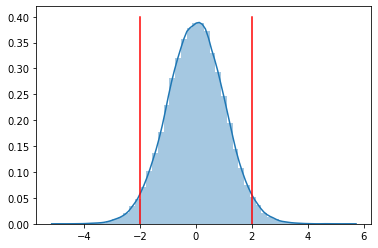

Доверительный интервал: [-0.0486 < b_1 < 0.2666]


In [8]:
confidence_interval_coeff(b_, var_b_, 1, n_obs)

### 2.1.13. Пример. Доверительный интервал для дисперсии [у доски]

Задача:
- Построить 95% доверительный интервал для σ ** 2

Условия задачи:

In [9]:
sigma = 11.07
n_obs = 47
k = 3

Функция для рассчета:

In [10]:
def confidence_interval_sigma(sigma, k, n_obs, level=0.95, round_fact=4):
    df = n_obs - k
    RSS = df * sigma ** 2
    
    x = np.linspace(0, 10, 10000)
    chi2_dist = chi2.ppf(x, df)
    
    q_left = level + (1 - level) / 2
    q_right = (1 - level) / 2
    
    chi2_crit_left, chi2_crit_right = chi2.ppf(q_left, df), chi2.ppf(q_right, df)
    
    print("Хи-квадрат распределение:")
    sns.distplot(chi2_dist)  
    plt.plot([chi2_crit_left, chi2_crit_left], [0, 0.04], color="r")
    plt.plot([chi2_crit_right, chi2_crit_right], [0, 0.04], color="r")
    plt.show(block=False)
    
    conf_int_left = round(RSS / chi2_crit_left, round_fact)
    conf_int_right = round(RSS / chi2_crit_right, round_fact)
    
    print("Доверительный интервал: [%s < σ ** 2 < %s]" % (conf_int_left, conf_int_right))

Рассчет:

Хи-квадрат распределение:


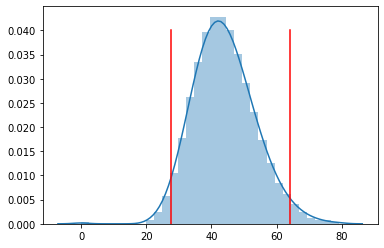

Доверительный интервал: [83.9852 < σ ** 2 < 195.5416]


In [11]:
confidence_interval_sigma(sigma, k, n_obs)

### 2.1.14. Пример. Проверка гипотезы о коэффициенте бета [у доски]

Задача:
- Проверить гипотезу: b_1 = 0, при α = 0.05

Условия задачи:

In [12]:
n_obs = 47
b_ = np.array([59.8, 0.109, 0.115])
var_b_ = np.array([[15.9, -0.257, -0.007], 
                   [-0.257, 0.00616, -0.00135], 
                   [-0.007, -0.00135, 0.00182]]).T
b = 0

Функция для рассчета:

In [149]:
def check_H(b_, b, var_b, b_ind, n_obs, level=0.95, round_fact=4):
    t = (b_[b_ind] - b) / np.sqrt(var_b[b_ind, b_ind])
    
    degr_free = n_obs - b_.shape[0]
    t_dist = np.random.standard_t(degr_free, size=100000)
    q = level + (1 - level) / 2
    quantile = round(np.quantile(t_dist, q=q), round_fact)
    
    print("Распределение Стьюдента:")
    sns.distplot(t_dist)
    plt.plot([quantile, quantile], [0, 0.4], color="r")
    plt.plot([-quantile, -quantile], [0, 0.4], color="r")
    plt.plot([t, t], [0, 0.4], color="b")
    plt.show(block=False)

    if (t > -quantile) and (t < quantile):
        print("""Так как значение t-статистики (%s) попало в область ограниченную критическими значениями, то гипотеза принимается: \n [%s < t < %s]""" % (round(t, round_fact), -quantile, quantile))
    else:
        print("""Так как значение t-статистики (%s) не попало в область ограниченную критическими значениями, то гипотеза отвергается\n""" % (round(t, round_fact)))
    p_value_l = 1 - len(t_dist[t_dist > t])/len(t_dist)
    p_value_r = len(t_dist[t_dist > t])/len(t_dist)
    p_value = 2 * min(p_value_l, p_value_r)
    print("p-value равно %s, то есть отвергая нулевую гипотезу, мы ошибемся с вероятностью %s процентов" % (round(p_value, round_fact), round(p_value, 2) * 100))

Рассчет:

Распределение Стьюдента:


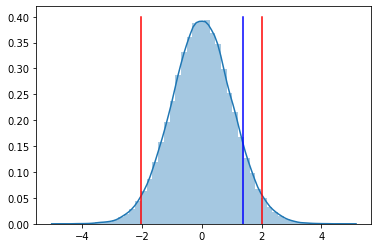

Так как значение t-статистики (1.3888) попало в область ограниченную критическими значениями, то гипотеза принимается: 
 [-2.0238 < t < 2.0238]
p-value равно 0.1722, то есть отвергая нулевую гипотезу, мы ошибемся с вероятностью 17.0 процентов


In [150]:
check_H(b_, 0, var_b_, 1, 47)

### 2.1.17. Проверка гипотезы о связи коэффициентов. Заключение [+доска]

Задача:
- Проверить гипотезу: b_1 - b_2 = 0, при α = 0.05

Условия задачи:

In [130]:
n_obs = 47
b_ = np.array([59.8, 0.109, 0.115])
var_b_ = np.array([[15.9, -0.257, -0.007], 
                   [-0.257, 0.00616, -0.00135], 
                   [-0.007, -0.00135, 0.00182]]).T

Функция для рассчета:

In [151]:
def check_corr(b_, var_b, b_1_ind, b_2_ind, n_obs, b_diff=0, level=0.95, round_fact=4):
    t = (b_[b_1_ind] - b_[b_2_ind] - b_diff) / np.sqrt(var_b[b_1_ind, b_1_ind] + var_b[b_2_ind, b_2_ind] + var_b[b_1_ind, b_2_ind])
    
    degr_free = n_obs - b_.shape[0]
    t_dist = np.random.standard_t(degr_free, size=100000)
    q = level + (1 - level) / 2
    quantile = round(np.quantile(t_dist, q=q), round_fact)
    
    print("Распределение Стьюдента:")
    sns.distplot(t_dist)
    plt.plot([quantile, quantile], [0, 0.4], color="r")
    plt.plot([-quantile, -quantile], [0, 0.4], color="r")
    plt.plot([t, t], [0, 0.4], color="b")
    plt.show(block=False)

    if (t > -quantile) and (t < quantile):
        print("""Так как значение t-статистики (%s) попало в область ограниченную критическими значениями, то гипотеза принимается: \n [%s < t < %s]""" % (round(t, round_fact), -quantile, quantile))
    else:
        print("""Так как значение t-статистики (%s) не попало в область ограниченную критическими значениями, то гипотеза отвергается\n""" % (round(t, round_fact)))
    p_value_l = 1 - len(t_dist[t_dist > t])/len(t_dist)
    p_value_r = len(t_dist[t_dist > t])/len(t_dist)
    p_value = 2 * min(p_value_l, p_value_r)
    print("p-value равно %s, то есть отвергая нулевую гипотезу, мы ошибемся с вероятностью %s процентов" % (round(p_value, round_fact), round(p_value, 2) * 100))

Рассчет:

Распределение Стьюдента:


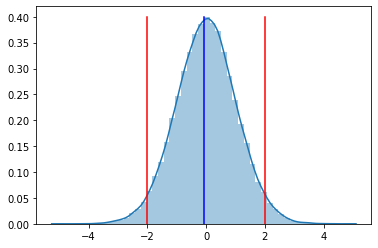

Так как значение t-статистики (-0.0737) попало в область ограниченную критическими значениями, то гипотеза принимается: 
 [-2.0146 < t < 2.0146]
p-value равно 0.9359, то есть отвергая нулевую гипотезу, мы ошибемся с вероятностью 94.0 процентов


In [152]:
check_corr(b_, var_b_, 1, 2, 47)